In [1]:
# pipenv install pandas plotly matplotlib pingouin nbformat ipykernel scikit-learn optuna ipywidgets gradio

# EDA

import pandas as pd
import pingouin as pg
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib as plt

# Machoine learning

from sklearn.model_selection import cross_validate, StratifiedGroupKFold, cross_val_predict, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Otimização de heperparametros

import optuna


In [2]:
# carregar Datasets
df_segmento = pd.read_csv('./datasets/segmento_cliente.csv')

EDA

In [3]:
df_segmento.head(10)

,atividade_economica,faturamento_mensal,numero_de_funcionarios,localizacao,idade,inovacao,segmento_de_cliente
0,Comércio,713109.95,12,Rio de Janeiro,6,1,Bronze
1,Comércio,790714.38,9,São Paulo,15,0,Bronze
2,Comércio,1197239.33,17,São Paulo,4,9,Silver
3,Indústria,449185.78,15,São Paulo,6,0,Starter
4,Agronegócio,1006373.16,15,São Paulo,15,8,Silver
5,Serviços,1629562.41,16,Rio de Janeiro,11,4,Silver
6,Serviços,771179.95,13,Vitória,0,1,Starter
7,Serviços,707837.61,16,São Paulo,10,6,Silver
8,Comércio,888983.66,17,Belo Horizonte,10,1,Bronze
9,Indústria,1098512.64,13,Rio de Janeiro,9,3,Bronze


In [4]:
# Estrtura do datasets
df_segmento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   atividade_economica     500 non-null    object 
 1   faturamento_mensal      500 non-null    float64
 2   numero_de_funcionarios  500 non-null    int64  
 3   localizacao             500 non-null    object 
 4   idade                   500 non-null    int64  
 5   inovacao                500 non-null    int64  
 6   segmento_de_cliente     500 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 27.5+ KB


In [5]:
# valores possiveis - variaves categoricas
df_segmento['atividade_economica'].unique()

array(['Comércio', 'Indústria', 'Agronegócio', 'Serviços'], dtype=object)

In [6]:
df_segmento['localizacao'].unique()

array(['Rio de Janeiro', 'São Paulo', 'Vitória', 'Belo Horizonte'],
      dtype=object)

In [7]:
df_segmento['segmento_de_cliente'].unique()

array(['Bronze', 'Silver', 'Starter', 'Gold'], dtype=object)

In [8]:
df_segmento['inovacao'].unique()

array([1, 0, 9, 8, 4, 6, 3, 7, 5, 2], dtype=int64)

In [9]:
# Distribuição da variavel segmento de cliente ( target)

contagem_target = df_segmento.value_counts('segmento_de_cliente')
contagem_target

segmento_de_cliente
Silver     260
Bronze     202
Starter     22
Gold        16
Name: count, dtype: int64

In [10]:
# Criar uma lista ordenada do target
lista_segmento = ['Starter', 'Bronze', 'Silver', 'Gold']

In [11]:
# Distribuicao d variavel target - contagem
px.bar(contagem_target, color=contagem_target.index,category_orders={'segmento_de_cliente': lista_segmento} )

In [12]:
# Distruibuicao da variavel target percentual
percentual_target = contagem_target/len(df_segmento) * 100
px.bar(percentual_target, color=percentual_target.index,category_orders={'segmento_de_cliente': lista_segmento} )

In [13]:
percentual_inovacao = df_segmento.value_counts('inovacao') /len(df_segmento) * 100
px.bar(percentual_inovacao, color=percentual_inovacao.index )

In [14]:
# Tabela de contingencia entre localizacao e target
crosstab_localizacao = pd.crosstab(df_segmento['localizacao'], df_segmento['segmento_de_cliente'], margins=True)[lista_segmento].reset_index()

tabela_localizacao = ff.create_table(crosstab_localizacao)

tabela_localizacao.show()


In [15]:
# Tabela de contingencia entre localizacao e target
crosstab_economica = pd.crosstab(df_segmento['atividade_economica'], df_segmento['segmento_de_cliente'], margins=True)[lista_segmento].reset_index()

tabela_economica = ff.create_table(crosstab_economica)

tabela_economica.show()


In [16]:
# Tabela de contingencia entre localizacao e target
crosstab_inovacao = pd.crosstab(df_segmento['inovacao'], df_segmento['segmento_de_cliente'], margins=True)[lista_segmento].reset_index()

tabela_in = ff.create_table(crosstab_inovacao)

tabela_in.show()

In [17]:
# Distribuicao Idade da Empresa
px.histogram(df_segmento, x='idade')

In [18]:
px.histogram(df_segmento, x='faturamento_mensal')

In [19]:
# BoxPlot entre idade e segmento
px.box(df_segmento, x='segmento_de_cliente', y='idade', color='segmento_de_cliente', category_orders={'segmento_de_cliente': lista_segmento})

In [20]:
px.box(df_segmento, x='segmento_de_cliente', y='faturamento_mensal', color='segmento_de_cliente', category_orders={'segmento_de_cliente': lista_segmento})

In [21]:
# Teste estatistico  Qui-quadrado de pearson
# H - as variaves são independentes
# H - as variaves não sao independentes 
# se p-value > 0.05, aceita a hipotse nula, caso contarrio

valor_esperado , valor_observado, Estatistica = pg.chi2_independence(df_segmento, 'segmento_de_cliente', 'localizacao')

c:\Users\isra_\.virtualenvs\Arvore_de_decisao-5g8P_47T\Lib\site-packages\pingouin\contingency.py:151: UserWarning:

Low count on observed frequencies.

c:\Users\isra_\.virtualenvs\Arvore_de_decisao-5g8P_47T\Lib\site-packages\pingouin\contingency.py:151: UserWarning:

Low count on expected frequencies.



In [22]:
# Valor esperado
# é a frequencia que seria  esperado se nao houvesse associacao entre as variaveis
# é calculado utilizando a distribuicao assumida no teste  que-quadrado
valor_esperado

localizacao,Belo Horizonte,Rio de Janeiro,São Paulo,Vitória
segmento_de_cliente,,,,
Bronze,44.844,52.924,48.884,55.348
Gold,3.552,4.192,3.872,4.384
Silver,57.720,68.120,62.920,71.240
Starter,4.884,5.764,5.324,6.028


In [23]:
# valor observado
# é a frequencia real dos dados coletados
valor_observado

localizacao,Belo Horizonte,Rio de Janeiro,São Paulo,Vitória
segmento_de_cliente,,,,
Bronze,39,62,45,56
Gold,4,3,5,4
Silver,63,60,65,72
Starter,5,6,6,5


In [24]:
# estatisticas
Estatistica.round(5)

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.00000,5.19335,9.0,0.81714,0.05884,0.11369
1,cressie-read,0.66667,5.19198,9.0,0.81726,0.05883,0.11367
2,log-likelihood,0.00000,5.19713,9.0,0.81680,0.05886,0.11374
3,freeman-tukey,-0.50000,5.20798,9.0,0.81581,0.05892,0.11390
4,mod-log-likelihood,-1.00000,5.22494,9.0,0.81428,0.05902,0.11414
5,neyman,-2.00000,5.27777,9.0,0.80945,0.05932,0.11490


As variaves localizacao e segmento de cliente sao independentes . QUI-Quadrado(p-value = 0.8)

In [25]:
valor_esperado , valor_observado, Estatistica = pg.chi2_independence(df_segmento, 'segmento_de_cliente', 'atividade_economica')

c:\Users\isra_\.virtualenvs\Arvore_de_decisao-5g8P_47T\Lib\site-packages\pingouin\contingency.py:151: UserWarning:

Low count on observed frequencies.

c:\Users\isra_\.virtualenvs\Arvore_de_decisao-5g8P_47T\Lib\site-packages\pingouin\contingency.py:151: UserWarning:

Low count on expected frequencies.

c:\Users\isra_\.virtualenvs\Arvore_de_decisao-5g8P_47T\Lib\site-packages\scipy\stats\_stats_py.py:7994: RuntimeWarning:

divide by zero encountered in power

c:\Users\isra_\.virtualenvs\Arvore_de_decisao-5g8P_47T\Lib\site-packages\scipy\stats\_stats_py.py:7994: RuntimeWarning:

invalid value encountered in multiply

c:\Users\isra_\.virtualenvs\Arvore_de_decisao-5g8P_47T\Lib\site-packages\scipy\stats\_stats_py.py:7991: RuntimeWarning:

divide by zero encountered in divide



In [26]:
valor_esperado

atividade_economica,Agronegócio,Comércio,Indústria,Serviços
segmento_de_cliente,,,,
Bronze,47.672,56.156,49.288,48.884
Gold,3.776,4.448,3.904,3.872
Silver,61.360,72.280,63.440,62.920
Starter,5.192,6.116,5.368,5.324


In [27]:
valor_observado

atividade_economica,Agronegócio,Comércio,Indústria,Serviços
segmento_de_cliente,,,,
Bronze,47,56,50,49
Gold,7,5,4,0
Silver,57,75,63,65
Starter,7,3,5,7


In [28]:
Estatistica.round(5)

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.00000,9.96998,9.0,0.35292,0.08153,0.18948
1,cressie-read,0.66667,10.60995,9.0,0.30339,0.08410,0.20060
2,log-likelihood,0.00000,13.54637,9.0,0.13940,0.09503,0.25375
3,freeman-tukey,-0.50000,NaN,9.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.00000,inf,9.0,0.00000,inf,NaN
5,neyman,-2.00000,NaN,9.0,NaN,NaN,NaN


### Treinamento do Modelo

In [29]:
# Separar X e y
from sklearn.model_selection import StratifiedKFold


X = df_segmento.drop(columns=['segmento_de_cliente'])
y = df_segmento['segmento_de_cliente']

# Lista de variáveis categóricas
categorical_features = ['atividade_economica', 'localizacao']

# Criar um transformador de variáveis categóricas usando OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Criar um pré-processador
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Pipeline com pré-processador e o modelo de árvore de decisão
dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

# Configurar validação cruzada estratificada
cv_folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=51)

# Treinar e validar o modelo
metrics_result = cross_validate(dt_model, X, y, cv=cv_folds, scoring=['accuracy'], return_estimator=True)



In [30]:
metrics_result

{'fit_time': array([0.00899744, 0.00299954, 0.00399971]),
 'score_time': array([0.00299954, 0.00200009, 0.00200129]),
 'estimator': [Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('cat',
                                                    Pipeline(steps=[('imputer',
                                                                     SimpleImputer(strategy='most_frequent')),
                                                                    ('onehot',
                                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                                    ['atividade_economica',
                                                     'localizacao'])])),
                  ('classifier', DecisionTreeClassifier())]),
  Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('cat',
                                                    Pipeline(steps=[('imputer',
        

In [31]:
# Média da acurracy, considerando os 3 splits
metrics_result['test_accuracy'].mean()

0.4739917754851743

In [32]:
# Acuracia determinar a qualidade d eum moedloe
# Total de previsoes corretas * total d eprevisoes


Métricas

In [33]:
# Fazendo predicoes usando cross validation
y_pred = cross_val_predict(dt_model, X, y, cv=cv_folds)

In [34]:
# Avaliar o desempenho do modelo
classification_report_str = classification_report(y, y_pred)

print(f'Relatorio de Classificação:\n{classification_report_str}')

Relatorio de Classificação:
              precision    recall  f1-score   support

      Bronze       0.41      0.36      0.38       202
        Gold       0.00      0.00      0.00        16
      Silver       0.51      0.63      0.57       260
     Starter       0.00      0.00      0.00        22

    accuracy                           0.47       500
   macro avg       0.23      0.25      0.24       500
weighted avg       0.43      0.47      0.45       500



c:\Users\isra_\.virtualenvs\Arvore_de_decisao-5g8P_47T\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\isra_\.virtualenvs\Arvore_de_decisao-5g8P_47T\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\isra_\.virtualenvs\Arvore_de_decisao-5g8P_47T\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



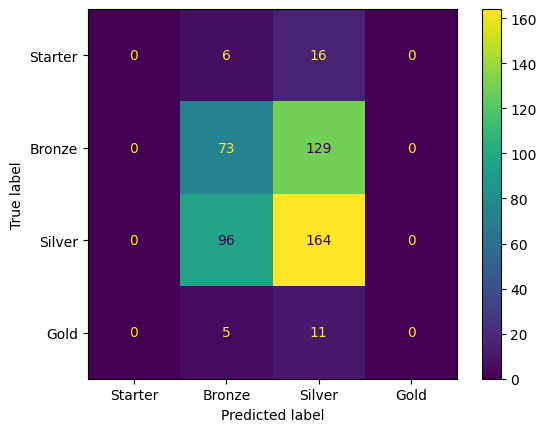

In [35]:
# Mostrar matrix de confusão
confusion_matrix_modelo = confusion_matrix(y, y_pred, labels=lista_segmento)
disp = ConfusionMatrixDisplay(confusion_matrix_modelo, display_labels=lista_segmento)
disp.plot()

#### Tuning de Hiperparametros

In [37]:
# Ajustar Hiperparetros do Modelo usando Optuma
# min_samples_leaf = Minimo de instancias requeridos para formar uma folha ( no terminal )
# max_depth = Prifundidade maxima da arvore

def decisiontree_optuna(trial):
    
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_depth = trial.suggest_int('max_depth', 2, 8)
    
    dt_model.set_params(classifier__min_samples_leaf=min_samples_leaf)
    dt_model.set_params(classifier__max_depth=max_depth)
    
    scores = cross_val_score(dt_model,X, y, cv=cv_folds, scoring='accuracy')
    
    return scores.mean()

In [38]:
# Executar a automacao de experimentos
estudo_decisisontree = optuna.create_study(direction='maximize')
estudo_decisisontree.optimize(decisiontree_optuna, n_trials=100)

[I 2024-07-01 16:16:59,537] A new study created in memory with name: no-name-40305c15-86ba-4c5b-a08b-16538e7cdfa7
[I 2024-07-01 16:16:59,566] Trial 0 finished with value: 0.4699877353726283 and parameters: {'min_samples_leaf': 11, 'max_depth': 3}. Best is trial 0 with value: 0.4699877353726283.
[I 2024-07-01 16:16:59,587] Trial 1 finished with value: 0.4739917754851743 and parameters: {'min_samples_leaf': 6, 'max_depth': 8}. Best is trial 1 with value: 0.4739917754851743.
[I 2024-07-01 16:16:59,612] Trial 2 finished with value: 0.4739917754851743 and parameters: {'min_samples_leaf': 13, 'max_depth': 7}. Best is trial 1 with value: 0.4739917754851743.
[I 2024-07-01 16:16:59,635] Trial 3 finished with value: 0.45398359906692637 and parameters: {'min_samples_leaf': 2, 'max_depth': 5}. Best is trial 1 with value: 0.4739917754851743.
[I 2024-07-01 16:16:59,658] Trial 4 finished with value: 0.4699877353726283 and parameters: {'min_samples_leaf': 15, 'max_depth': 3}. Best is trial 1 with valu

In [39]:
# Mostrar melhor resultado e melhor consjunto de hiperparametro

print(f'Melhor acurácia: {estudo_decisisontree.best_value}')
print(f'Melhores parametros: {estudo_decisisontree.best_params}') 

Melhor acurácia: 0.4740518962075848
Melhores parametros: {'min_samples_leaf': 17, 'max_depth': 2}


### Visualizar Arvore

In [42]:
# Preparar o conjunto de dados para treinar e conseguir visuzlizar a arvore
X_train_tree = X.copy()
X_train_tree['localizacao_label'] = X_train_tree.localizacao.astype('category').cat.codes
X_train_tree['atividade_economica_label'] = X_train_tree.atividade_economica.astype('category').cat.codes
X_train_tree.drop(columns=['localizacao', 'atividade_economica'], axis=1, inplace=True)
X_train_tree.rename(columns={'localizacao_label': 'localizacao' ,'atividade_economicao_label': 'atividade_economica'}, inplace=True)
X_train_tree.head(10)


,faturamento_mensal,numero_de_funcionarios,idade,inovacao,localizacao,atividade_economica_label
0,713109.95,12,6,1,1,1
1,790714.38,9,15,0,2,1
2,1197239.33,17,4,9,2,1
3,449185.78,15,6,0,2,2
4,1006373.16,15,15,8,2,0
5,1629562.41,16,11,4,1,3
6,771179.95,13,0,1,3,3
7,707837.61,16,10,6,2,3
8,888983.66,17,10,1,0,1
9,1098512.64,13,9,3,1,2


In [47]:
# Treinar o modelo com o conjunto de hiperparametr ideal

clf_decisiontree = DecisionTreeClassifier(min_samples_leaf=estudo_decisisontree.best_params['min_samples_leaf'],
                                      max_depth=estudo_decisisontree.best_params['max_depth'])

y_train_tree = y.copy()

clf_decisiontree.fit(X_train_tree,y_train_tree)


DecisionTreeClassifier(max_depth=2, min_samples_leaf=17)

[Text(0.5, 0.8333333333333334, 'inovacao <= 2.5\ngini = 0.563\nsamples = 500\nvalue = [202, 16, 260, 22]\nclass = Silver'),
 Text(0.25, 0.5, 'faturamento_mensal <= 497183.891\ngini = 0.482\nsamples = 165\nvalue = [112, 0, 35, 18]\nclass = Starter'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.432\nsamples = 19\nvalue = [6, 0, 0, 13]\nclass = Gold'),
 Text(0.375, 0.16666666666666666, 'gini = 0.414\nsamples = 146\nvalue = [106, 0, 35, 5]\nclass = Starter'),
 Text(0.75, 0.5, 'faturamento_mensal <= 549601.438\ngini = 0.474\nsamples = 335\nvalue = [90.0, 16.0, 225.0, 4.0]\nclass = Silver'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.459\nsamples = 37\nvalue = [26, 0, 7, 4]\nclass = Starter'),
 Text(0.875, 0.16666666666666666, 'gini = 0.416\nsamples = 298\nvalue = [64.0, 16.0, 218.0, 0.0]\nclass = Silver')]

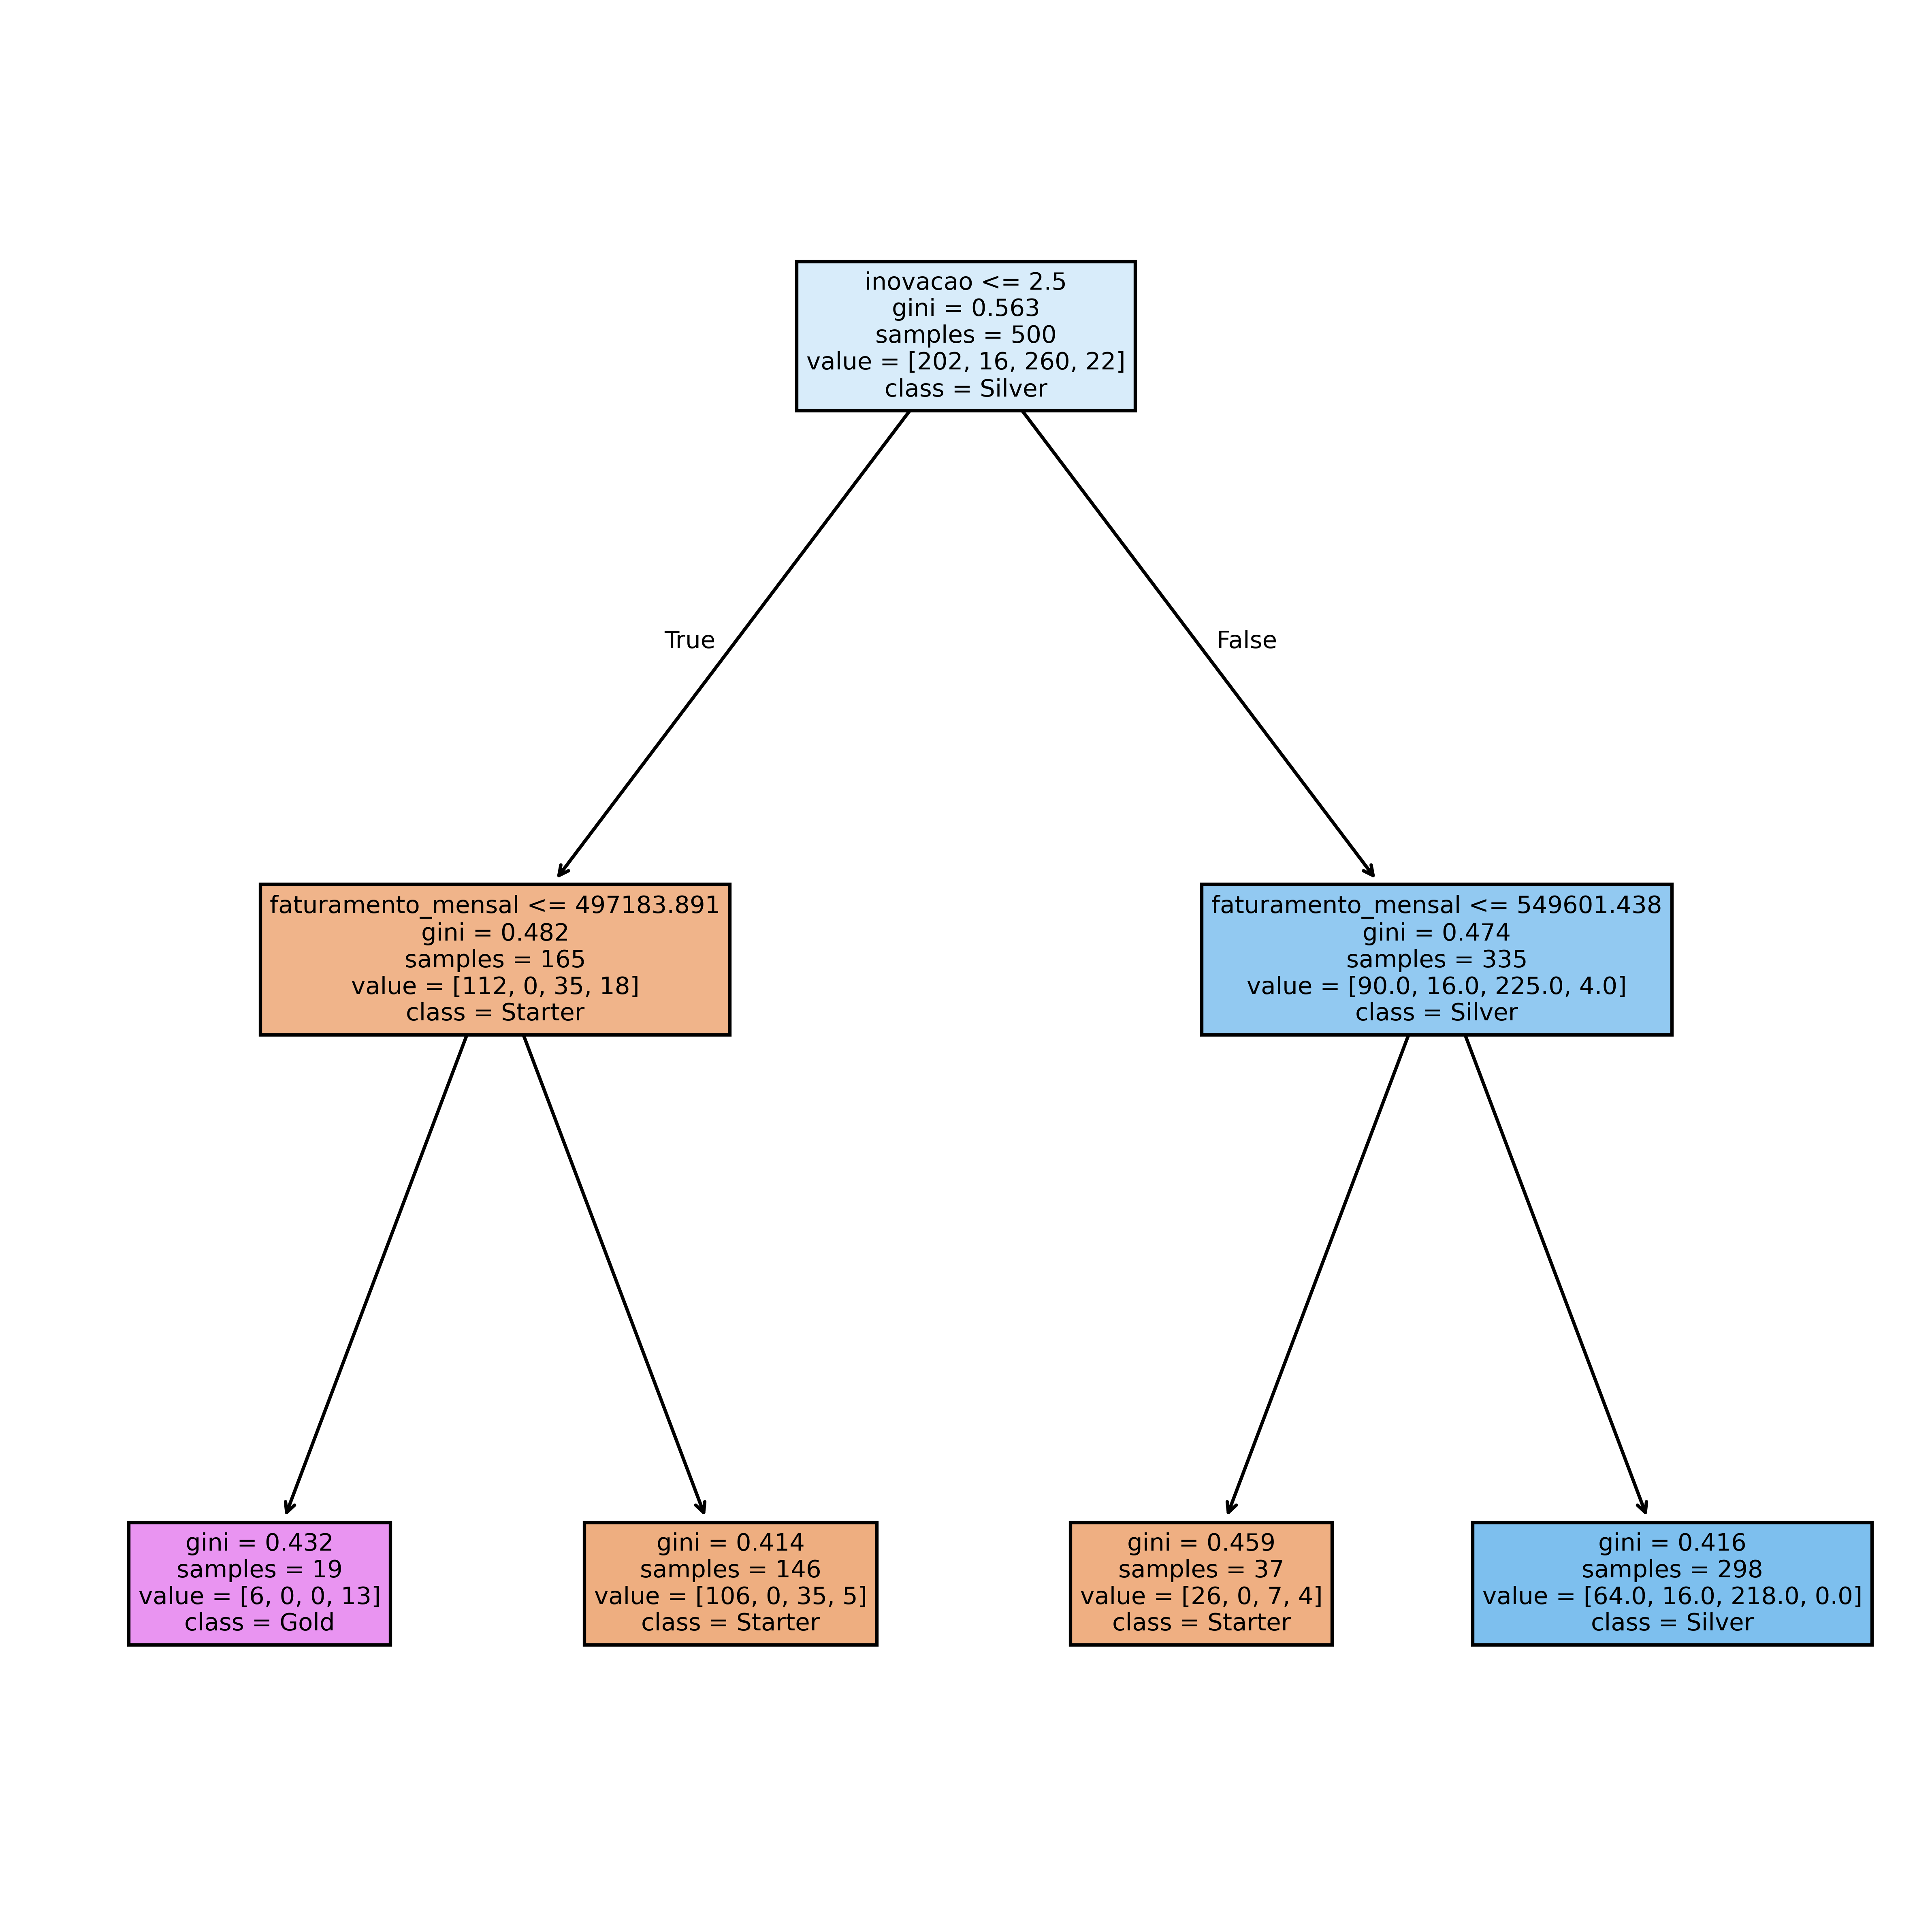

In [48]:
# Vizualizar arvore de decisao com plot tree
import matplotlib.pyplot as plt


fig, axes = plt.subplots(nrows= 1, ncols = 1, figsize=(10,10), dpi=600)
plot_tree(clf_decisiontree, feature_names=X_train_tree.columns.to_numpy(), class_names=lista_segmento, filled=True)

### Salvar o Modelo

In [49]:
import joblib



# Criar um pipeline "tunado"

dt_model_tunado = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier(min_samples_leaf=estudo_decisisontree.best_params['min_samples_leaf'],
                                      max_depth=estudo_decisisontree.best_params['max_depth'])
 ) ])

# Treinar o modelo
dt_model_tunado.fit(X, y)

# Salvar modelo

joblib.dump(dt_model_tunado, 'modelo_classificaca_decision_tree.pkl')

['modelo_classificaca_decision_tree.pkl']

### Entregar modleo como aaa de predicao batch ( por arquivo)

In [51]:
import gradio as gr 

modelo = joblib.load('./modelo_classificaca_decision_tree.pkl')

def predict(arquivo):
    df_empresas = pd.read_csv(arquivo.name)
    y_pred = modelo.predict(df_empresas)
    df_segmentos = pd.DataFrame(y_pred, columns=['segmento_de_cliente'])
    df_predicoes = pd.concat([df_empresas, df_segmentos], axis=1)
    df_predicoes.to_csv('./predicoes.csv', index=False)
    return './predicoes.csv'

demo = gr.Interface(
    predict,
    gr.File(file_types=[".csv"]),
    "file"
)

demo.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
